In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from pathlib import Path

In [2]:
crime_per_state_path = "Data/Crime_data_per_state.csv"

In [3]:
crime_stats = pd.read_csv(crime_per_state_path)
crime_stats

,Area Name,Year,Variable,Value
0,Colorado,2015,Violent Crimes Per 100,321
1,Delaware,1990,Violent Crimes Per 100,655
2,California,1994,Violent Crimes Per 100,1013
3,Delaware,2014,Property Crimes Per 100,2982
4,Utah,2014,Property Crimes Per 100,2879
...,...,...,...,...
4126,New York,1991,Crimes Per 100,6245
4127,District of Columbia,2005,Crimes Per 100,6206
4128,Connecticut,1998,Crimes Per 100,3787
4129,New Hampshire,2009,Crimes Per 100,2321


In [4]:
crime_stats_2016 = crime_stats[crime_stats['Year'] == 2016]
crime_stats_2016

,Area Name,Year,Variable,Value
6,New York,2016,Property Crimes Per 100,1546
42,Minnesota,2016,Crimes Per 100,2376
44,Nevada,2016,Property Crimes Per 100,2587
45,New Mexico,2016,Property Crimes Per 100,3937
64,West Virginia,2016,Crimes Per 100,2405
...,...,...,...,...
3980,California,2016,Violent Crimes Per 100,445
3982,Kansas,2016,Property Crimes Per 100,2696
4057,Missouri,2016,Violent Crimes Per 100,519
4094,Mississippi,2016,Crimes Per 100,3049


In [5]:
crime_stats_2016.rename(columns={'Area Name': 'State',
                   'Variable': 'Crime Type',
                    'Value': 'Total Crimes'},
          inplace=True)
crime_stats_2016

C:\Users\swire\AppData\Local\Temp\ipykernel_19124\3062401968.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  crime_stats_2016.rename(columns={'Area Name': 'State',


,State,Year,Crime Type,Total Crimes
6,New York,2016,Property Crimes Per 100,1546
42,Minnesota,2016,Crimes Per 100,2376
44,Nevada,2016,Property Crimes Per 100,2587
45,New Mexico,2016,Property Crimes Per 100,3937
64,West Virginia,2016,Crimes Per 100,2405
...,...,...,...,...
3980,California,2016,Violent Crimes Per 100,445
3982,Kansas,2016,Property Crimes Per 100,2696
4057,Missouri,2016,Violent Crimes Per 100,519
4094,Mississippi,2016,Crimes Per 100,3049


In [6]:
crime_stats_2016_a_z = crime_stats_2016.sort_values(by=['State', 'Crime Type'], ascending=[True, True])
crime_stats_2016_a_z

,State,Year,Crime Type,Total Crimes
569,Alabama,2016,Crimes Per 100,3480
768,Alabama,2016,Property Crimes Per 100,2948
728,Alabama,2016,Violent Crimes Per 100,532
2204,Alaska,2016,Crimes Per 100,4157
3707,Alaska,2016,Property Crimes Per 100,3353
...,...,...,...,...
472,Wisconsin,2016,Property Crimes Per 100,1933
2598,Wisconsin,2016,Violent Crimes Per 100,306
2106,Wyoming,2016,Crimes Per 100,2202
3212,Wyoming,2016,Property Crimes Per 100,1957


In [7]:
crime_stats_2016_cleaned = crime_stats_2016_a_z.drop(columns=['Year'])

crime_stats_2016_cleaned = crime_stats_2016_cleaned[crime_stats_2016_cleaned['Crime Type'] != 'Crimes Per 100']

crime_stats_2016_cleaned

,State,Crime Type,Total Crimes
768,Alabama,Property Crimes Per 100,2948
728,Alabama,Violent Crimes Per 100,532
3707,Alaska,Property Crimes Per 100,3353
3063,Alaska,Violent Crimes Per 100,804
3496,Arizona,Property Crimes Per 100,2978
...,...,...,...
1823,West Virginia,Violent Crimes Per 100,358
472,Wisconsin,Property Crimes Per 100,1933
2598,Wisconsin,Violent Crimes Per 100,306
3212,Wyoming,Property Crimes Per 100,1957


In [8]:
crime_stats_2016_cleaned.to_csv('Data/Crime_types_per_state.csv', index=False)

In [9]:
crime_stats_2016_totals = crime_stats_2016_cleaned.groupby('State')['Total Crimes'].sum()
crime_stats_2016_totals

State
Alabama                 3480
Alaska                  4157
Arizona                 3448
Arkansas                3820
California              2998
Colorado                3084
Connecticut             2035
Delaware                3275
District of Columbia    6009
Florida                 3117
Georgia                 3403
Hawaii                  3302
Idaho                   1974
Illinois                2485
Indiana                 2994
Iowa                    2377
Kansas                  3076
Kentucky                2422
Louisiana               3864
Maine                   1770
Maryland                2757
Massachusetts           1938
Michigan                2369
Minnesota               2376
Mississippi             3049
Missouri                3318
Montana                 3052
Nebraska                2554
Nevada                  3265
New Hampshire           1711
New Jersey              1790
New Mexico              4640
New York                1922
North Carolina          3110
North Da

In [10]:
crime_2016_totals_df = crime_stats_2016_totals.to_frame()
crime_2016_totals_df.reset_index(inplace=True)
crime_2016_totals_df.insert(0, "Ranking",'')
crime_2016_totals_df 

,Ranking,State,Total Crimes
0,,Alabama,3480
1,,Alaska,4157
2,,Arizona,3448
3,,Arkansas,3820
4,,California,2998
5,,Colorado,3084
6,,Connecticut,2035
7,,Delaware,3275
8,,District of Columbia,6009
9,,Florida,3117


In [11]:
crime_2016_final= crime_2016_totals_df.sort_values(by=['Total Crimes'], ascending=[False])
crime_2016_final

,Ranking,State,Total Crimes
8,,District of Columbia,6009
31,,New Mexico,4640
1,,Alaska,4157
18,,Louisiana,3864
3,,Arkansas,3820
47,,Washington,3796
40,,South Carolina,3746
42,,Tennessee,3487
0,,Alabama,3480
2,,Arizona,3448


In [12]:
crime_2016_final.to_csv('Data/Crime_stats_2016.csv', index=False)

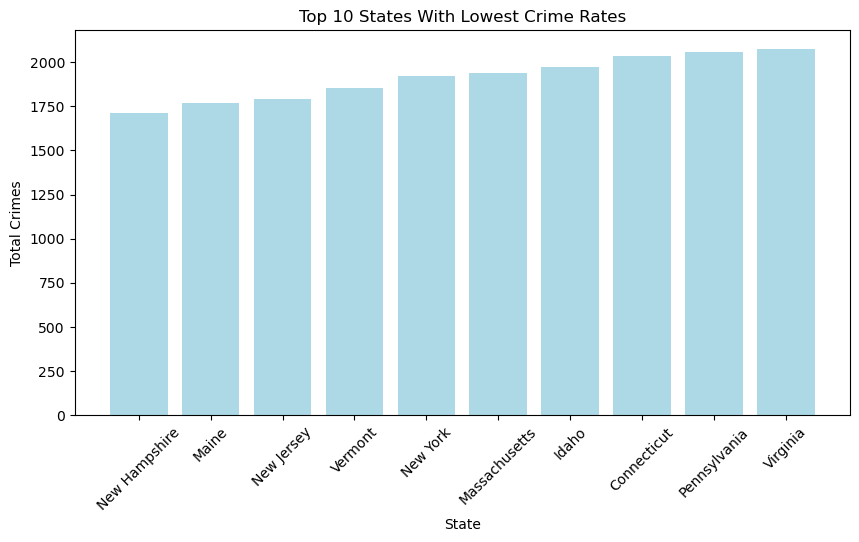

In [13]:
lowest_crime_10_states_graph = crime_2016_final.sort_values(by='Total Crimes', ascending=True).head(10)
plt.figure(figsize=(10, 5))
plt.bar(lowest_crime_10_states_graph['State'], lowest_crime_10_states_graph['Total Crimes'], color='lightblue')
plt.xlabel('State')
plt.ylabel('Total Crimes')
plt.title('Top 10 States With Lowest Crime Rates')
plt.xticks(rotation=45)
plt.savefig('lowest_crime_10_states_graph.png', dpi=100, bbox_inches = "tight")
plt.show()

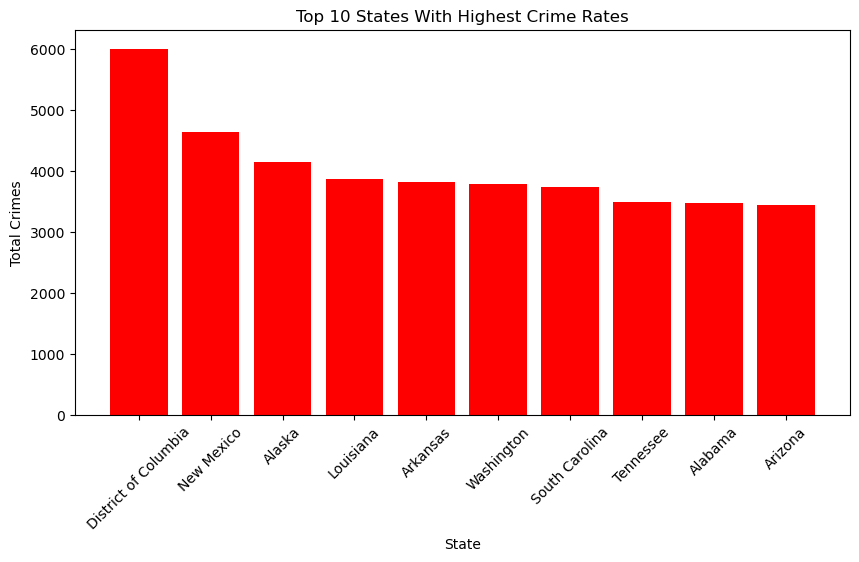

In [14]:
highest_crime_10_states_graph = crime_2016_final.sort_values(by='Total Crimes', ascending=False).head(10)
plt.figure(figsize=(10, 5))
plt.bar(highest_crime_10_states_graph['State'], highest_crime_10_states_graph['Total Crimes'], color='red')
plt.xlabel('State')
plt.ylabel('Total Crimes')
plt.title('Top 10 States With Highest Crime Rates')
plt.xticks(rotation=45)
plt.savefig('highest_crime_10_states_graph.png', dpi=100, bbox_inches = "tight")
plt.show()